# Useful Links

https://hepweb.ucsd.edu/ph110b/110b_notes/node31.html

https://hepweb.ucsd.edu/ph110b/110b_notes/node36.html

# Import Packages

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import plotly.graph_objects as go
from IPython.display import HTML

# Solving Lagrange's Equations

<p align="center">
  <img src="../images/eulerangles.JPG" alt="drawing" width="300" align="center"/>
</p>

Assume the top of the spinning top is pointed along $x_3$. The angular momentum vector in terms of the Euler angles $\theta$, $\phi$ and $\psi$ is

$$\vec{\omega} = \begin{bmatrix}\dot{\phi}\sin(\theta)\sin(\psi) + \dot{\theta}\cos(\psi)\\\dot{\phi}\sin(\theta)\cos(\psi) - \dot{\theta}\sin(\psi)\\ \dot{\phi}\cos(\theta) + \dot{\psi} \end{bmatrix}$$

So the kinetic energy is

$$T = \frac{1}{2}\omega^T I \omega$$ 

where $I$ is the moment of inertia tensor for the spinning top (see last video). The potential energy is given by the location of the center of mass $V = mgh\cos(\theta)$ where $h$ is the $z$ location of the center of mass. Thus the Lagrangian $\mathcal{L} = T-V$ is

$$\mathcal{L} = \frac{1}{2}\omega^T I \omega - mgh\cos(\theta)$$

Let $L$ (note: *not* the Lagrangian) be the length of the spinning top. We can turn this into a dimensionless quantity by dividing by $mL^2$

$$\frac{\mathcal{L}}{mL^2} =  \frac{1}{2}\omega^T \left(\frac{I}{mL^2}\right) \omega - \left(\frac{g}{L}\right)\left(\frac{h}{L}\right)\cos(\theta)$$

We can prime everything that is dimensionless

$$\mathcal{L}' = \frac{1}{2}\omega^T I' \omega - g'h'\cos(\theta)$$

Below, we will omit the primes, but note that everything we deal with in the code is dimensionless quantities. This works because $\mathcal{L}$ and $\mathcal{L}'$ yield the same equations of motion.

# Solve Lagranges Equation 

Define all appropriate symbols and declare appropriate functions

In [16]:
t, h, g = smp.symbols('t h g', real=True)
the, phi, psi = smp.symbols(r'\theta \phi \psi', cls=smp.Function)
the = the(t)
phi = phi(t)
psi = psi(t)
# Derivatives
the_d = smp.diff(the,t)
phi_d = smp.diff(phi,t)
psi_d = smp.diff(psi,t)
# Second derivatives
the_dd = smp.diff(the_d,t)
phi_dd = smp.diff(phi_d,t)
psi_dd = smp.diff(psi_d,t)

Transformation matrix. This matrix $R$ takes a vector in the $x_1,x_2,x_3$ coordinate system and transforms it into a vector into the $x,y,z$ coordinate system. We need this because the top of the spinning top is always at $\left<1,0,0\right>$ in the $x_1,x_2,x_3$ coordinate system, and so we rotate to get the position in the $x,y,z$ coodinate system.

In [17]:
R3 = smp.Matrix([[smp.cos(psi),-smp.sin(psi),0],
                 [smp.sin(psi),smp.cos(psi),0],
                 [0,0,1]])

R2 = smp.Matrix([[1,0,0],
                 [0,smp.cos(the),-smp.sin(the)],
                 [0,smp.sin(the),smp.cos(the)]])

R1 = smp.Matrix([[smp.cos(phi),-smp.sin(phi),0],
                 [smp.sin(phi),smp.cos(phi),0],
                 [0,0,1]])

R = R1*R2*R3

Get the position of the top of the spinning top as a function of time.

In [18]:
R@smp.Matrix([0,0,1])

Matrix([
[ sin(\phi(t))*sin(\theta(t))],
[-sin(\theta(t))*cos(\phi(t))],
[              cos(\theta(t))]])

Define the angular momentum vector $\omega$ in terms of the euler angles $\theta$, $\phi$ and $\omega$. 

* This is non-trivial: see http://galileoandeinstein.physics.virginia.edu/7010/CM_26_Euler_Angles.html for where these definitions come from.

In [19]:
omega = smp.Matrix([phi_d*smp.sin(the)*smp.sin(psi)+the_d*smp.cos(psi),
                    phi_d*smp.sin(the)*smp.cos(psi)-the_d*smp.sin(psi),
                    phi_d*smp.cos(the)+psi_d])
omega

Matrix([
[ sin(\psi(t))*sin(\theta(t))*Derivative(\phi(t), t) + cos(\psi(t))*Derivative(\theta(t), t)],
[-sin(\psi(t))*Derivative(\theta(t), t) + sin(\theta(t))*cos(\psi(t))*Derivative(\phi(t), t)],
[                             cos(\theta(t))*Derivative(\phi(t), t) + Derivative(\psi(t), t)]])

Define the moment of inertia tensor

In [20]:
Ixx, Iyy, Izz, Ixy, Iyz, Ixz = smp.symbols('I_{xx}, I_{yy}, I_{zz}, I_{xy}, I_{yz}, I_{xz}', real=True)
I = smp.Matrix([[Ixx,Ixy,Ixz],[Ixy,Iyy,Iyz],[Ixz,Iyz,Izz]])

Define the Lagrangian

In [21]:
T = smp.Rational(1,2)*omega.T.dot(I*omega).simplify()
V = g*h*smp.cos(the)
L = T-V

Obtain Lagrange's Equations 

$$\frac{\partial L}{ \partial X} - \frac{d}{dt}\frac{\partial L}{ \partial \dot{X}}$$

for each of $X \in \left\{ \theta, \phi, \psi \right\}$

In [22]:
LE1 = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t)
LE1 = LE1.simplify()

LE2 = smp.diff(L, phi) - smp.diff(smp.diff(L, phi_d), t)
LE2 = LE2.simplify()

LE3 = smp.diff(L, psi) - smp.diff(smp.diff(L, psi_d), t)
LE3 = LE3.simplify()

In [23]:
LE1

I_{xx}*sin(2*\psi(t) - 2*\theta(t))*Derivative(\phi(t), t)**2/8 + I_{xx}*sin(2*\psi(t) - \theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t)/2 - I_{xx}*sin(2*\psi(t) + \theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t)/2 - I_{xx}*sin(2*\psi(t) + 2*\theta(t))*Derivative(\phi(t), t)**2/8 + I_{xx}*sin(2*\psi(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t) + I_{xx}*sin(2*\theta(t))*Derivative(\phi(t), t)**2/4 - I_{xx}*cos(2*\psi(t) - \theta(t))*Derivative(\phi(t), (t, 2))/4 + I_{xx}*cos(2*\psi(t) + \theta(t))*Derivative(\phi(t), (t, 2))/4 - I_{xx}*cos(2*\psi(t))*Derivative(\theta(t), (t, 2))/2 - I_{xx}*Derivative(\theta(t), (t, 2))/2 + I_{xy}*sin(2*\psi(t) - \theta(t))*Derivative(\phi(t), (t, 2))/2 - I_{xy}*sin(2*\psi(t) + \theta(t))*Derivative(\phi(t), (t, 2))/2 + I_{xy}*sin(2*\psi(t))*Derivative(\theta(t), (t, 2)) + I_{xy}*cos(2*\psi(t) - 2*\theta(t))*Derivative(\phi(t), t)**2/4 + I_{xy}*cos(2*\psi(t) - \theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t) - I_{xy}*cos(

Use the three equations

$$\frac{\partial L}{ \partial X} - \frac{d}{dt}\frac{\partial L}{ \partial \dot{X}} = 0$$

for each of $X \in \left\{ \theta, \phi, \psi \right\}$ to solve for $\ddot{\theta}$, $\ddot{\phi}$ and $\ddot{\psi}$. This is possible because each of these equations is **linear** in terms of second derivatives.


In [24]:
sols = smp.solve([LE1, LE2, LE3], (the_dd, phi_dd, psi_dd),
                simplify=False, rational=False)

We have three equations for second derivatives

$$\ddot{\theta} = f_1(\theta, \phi, \psi, \dot{\theta}, \dot{\phi}, \dot{\psi})$$
$$\ddot{\phi} = f_2(\theta, \phi, \psi, \dot{\theta}, \dot{\phi}, \dot{\psi})$$
$$\ddot{\psi} = f_3(\theta, \phi, \psi, \dot{\theta}, \dot{\phi}, \dot{\psi})$$

but python can only work with first order ODEs. Defining $z_1 = \dot{\theta}$, $z_2 = \dot{\phi}$ and $z_3 = \dot{\psi}$, we get 6 first order ODEs.

* $\dot{\theta} =z_1$
* $\dot{z_1} = f_1(\theta, \phi, \psi, z_1, z_2, z_3)$
* $\dot{\phi} =z_2$
* $\dot{z_2} = f_2(\theta, \phi, \psi, z_1, z_2, z_3)$
* $\dot{\psi} =z_3$
* $\dot{z_3} = f_3(\theta, \phi, \psi, z_1, z_2, z_3)$

Convert the sympy **symbolic** functions into typical python **numerical** functions

In [25]:
dz1dt_f = smp.lambdify((g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,the_d,phi_d,psi_d), sols[the_dd])
dthedt_f = smp.lambdify(the_d, the_d)

dz2dt_f = smp.lambdify((g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,the_d,phi_d,psi_d), sols[phi_dd])
dphidt_f = smp.lambdify(phi_d, phi_d)

dz3dt_f = smp.lambdify((g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,the_d,phi_d,psi_d), sols[psi_dd])
dpsidt_f = smp.lambdify(psi_d, psi_d)

Define the system of equations $S=(\theta, z_1, \phi, z_2, \psi, z_3)$ and $dS/dt = f(S,t)$

In [26]:
def dSdt(S, t):
    the, z1, phi, z2, psi, z3 = S
    return [
        dthedt_f(z1),
        dz1dt_f(g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,z1,z2,z3),
        dphidt_f(z2),
        dz2dt_f(g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,z1,z2,z3),
        dpsidt_f(z3),
        dz3dt_f(g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,z1,z2,z3),
    ]

# Obtain Information About Spinning Top

This is discussed more thoroughly in my previous video

In [27]:
coords = np.loadtxt('../data/spinning_top2.txt', unpack=True, delimiter=',', dtype=int)
# Get the correct xyz axes
coords[[1, 2]] = coords[[2, 1]] 
# normalize coordinates
coords = coords/max(coords.ravel()) 
# Adjust position so z axis is in center
x_mean, y_mean, z_max = np.mean(coords[0]), np.mean(coords[1]), max(coords[2])
P0 = x_mean, y_mean, z_max
coords = coords.T - P0
coords = coords.T
# Make z positive
coords[2] = -coords[2]
x, y, z = coords

Define the mass $m_i$ of each voxel as a function of $x,y,z$. If $m_i=1$ everywhere then all voxels weigh the same and the top is isotropic.

In [28]:
# Mass Type 1
#m = np.ones(len(z))
# Mass 2
m = z**2 + np.exp(x)

Compute the momentum of inertia tensor

In [29]:
N = coords.shape[1]
Ixx = sum(m*(coords[1]**2 + coords[2]**2))/sum(m)
Iyy = sum(m*(coords[0]**2 + coords[2]**2))/sum(m)
Izz = sum(m*(coords[0]**2 + coords[1]**2))/sum(m)
Ixy = sum(m*coords[0]*coords[1])/sum(m)
Iyz = sum(m*coords[1]*coords[2])/sum(m)
Ixz = sum(m*coords[0]*coords[2])/sum(m)
I = np.array([[Ixx, Ixy, Ixz],[Ixy, Iyy, Iyz],[Ixz, Iyz, Izz]])

Define appropriate quantities 

* $g'=g/L$ and gravity is $9.8~$m/s$^2$ and $L=5~$cm. 
* $h$ is the location of the center of mass in the z direction.

In [30]:
g = 9.8/0.05
h = np.sum(m*coords[2])/sum(m)

Give the mass its appropriate initial condition

* $\theta_0 = \pi/4$ (spinning top is slightly tipped)
* $\dot{\theta_0}=0$ (no tipping velocity)
* $\phi_0 = 0$ (this is arbitrary so just set equal to zero)
* $\dot{\phi_0}=10$ (slight initial movement in this direction)
* $\psi_0 = 0$ (arbitrary)
* $\dot{\psi_0}=120\pi$ (spinning top is spinning fast)

and then solve differential equation between $t=0$ to $t=2$ seconds.

In [31]:
t = np.linspace(0, 2, 10000)
# Initial Condition 1
ans = odeint(dSdt, y0=[np.pi/4, 0, 0, 10, 0, 2*np.pi*60], t=t)

Get solutions for euler angles and top of spinning top.

In [32]:
the_t = ans.T[0]
phi_t = ans.T[2]
psi_t = ans.T[4]
x_t = np.sin(phi_t)*np.sin(the_t)
y_t = -np.cos(phi_t)*np.sin(the_t)
z_t = np.cos(the_t)

Plot $\theta$ (tip of spinning top) as function of time

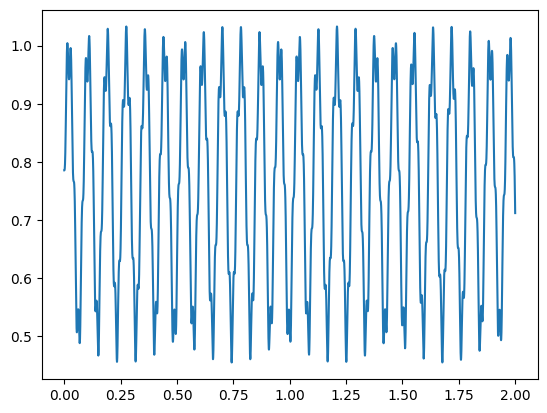

In [33]:
plt.plot(t,the_t)

Plot the location of the top of the spinning top as a function of time using an interactive 3D plotly plot.

In [34]:
i = 0
f= 10000

In [36]:
layout = go.Layout(title=r'Plot Title',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(layout=layout)
fig.add_scatter3d(x=[0],y=[0],z=[0])
fig.add_scatter3d(x=x_t[i:f],y=y_t[i:f],z=z_t[i:f], mode='lines',
                  line = dict(color='green', width=10))

fig.update_layout(
    scene = dict(xaxis = dict(range=[-1,1],),
                 yaxis = dict(range=[-1,1],),
                 zaxis = dict(range=[-1,1],),))

# HTML(fig.to_html(default_width=1000, default_height=600))
fig